# Hands-on exercise

In this simple example you are required to perform a simple linear regression with scipy. Find all the information on the function in the documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

### Assignment

1) Load the provided .csv file with the used car data

2) Use a linear regression to estimate the car prices from the year, kilometers or engine power. You can make a simple 1D regression from each one of the parameters independently (as an optional task you can also try a 2D or 3D regression combining multiple cues)

3) Firstly perform the estimation using the scipy linregress function (or alternatively you can use the sklearn.linear_model.LinearRegression class).
NB: check the documentation of the two methods!! In particular be aware of the number of outputs (in case use "_" to avoid the return of a specific output).

4) Have a look at the correlation coefficient to see which of the 3 features works better

5) (optional) Then implement the least square algorithm: you should get exactly the same solution of linregress !

6) Plot the data and the lines representing the output of the linregress and least square algorithms


In [1]:
import matplotlib.pyplot as plt
import csv
from scipy import stats
import numpy as np
import sklearn as sl
import pandas as pd

def f(x, m, q):
    return m*x+q

            km  year   powerPS  avgPrice
0     0.827586   0.0  0.000000  0.004009
1     1.000000   0.0  0.000000  0.002643
2     0.000000   0.0  0.071429  0.001392
3     0.310345   0.0  0.071429  0.010854
4     0.379310   0.0  0.071429  0.015597
...        ...   ...       ...       ...
1292  0.000000   1.0  0.785714  0.832462
1293  0.034483   1.0  0.785714  1.000000
1294  0.103448   1.0  0.785714  0.911998
1295  0.034483   1.0  0.928571  0.705391
1296  0.103448   1.0  0.928571  0.726913

[1297 rows x 4 columns]
[[1.250000e+05 1.500000e+05 5.000000e+03 ... 2.000000e+04 1.000000e+04
  2.000000e+04]
 [2.001000e+03 2.001000e+03 2.001000e+03 ... 2.015000e+03 2.015000e+03
  2.015000e+03]
 [4.000000e+01 4.000000e+01 6.000000e+01 ... 2.600000e+02 3.000000e+02
  3.000000e+02]
 [1.371110e+03 1.298700e+03 1.232430e+03 ... 4.949238e+04 3.854269e+04
  3.968332e+04]]


[<Axes: > <Axes: > <Axes: >]
0
1
2


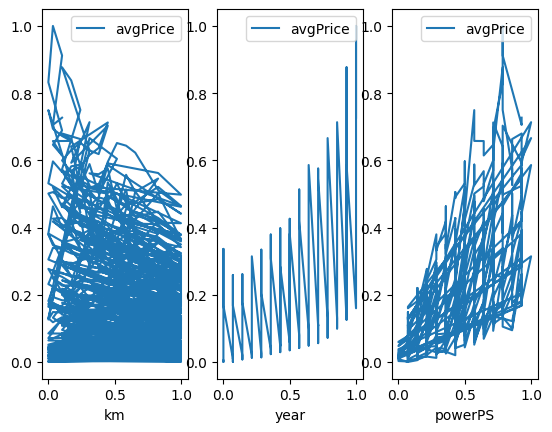

In [2]:
# Load the provided data file with the used car data (you can also have a look at it with any text editor)

filename = "data/km_year_power_price.csv"
lines = csv.reader(open(filename, newline=''), delimiter=',')

# place your loading code here
df_raw = pd.read_csv(filename)
print
data = df_raw.to_numpy().transpose()
indeces = df_raw.columns.values.tolist()
#using min max normalization just for visualization
df=(df_raw-df_raw.min())/(df_raw.max()-df_raw.min())

print(df)
print(data)
#plot all the dependencies with y = "avgPrice"
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True)
print(axes)
for i, _x in enumerate(indeces[:-1]):
    df.plot(x=_x, y="avgPrice", ax = axes[i])
    print(i)

Use linear regression to estimate the car prices from the year, kilometers or engine power. 
You can make a simple 1D regression from each one of the parameters independently 




In [3]:
# linear regression with linregress (estimate price from year)
from scipy.stats import linregress
y = data[-1]

results = [linregress(data[i], y) for i in range(3)]
print(results)

rho = [res.rvalue for res in results]
print(rho)
#So the best correlation factor is obtained by the last parameter: powerPS

[LinregressResult(slope=-0.05425151330972561, intercept=16692.345302519734, rvalue=-0.2572867429988496, pvalue=4.689714410723692e-21, stderr=0.005662227565052588, intercept_stderr=512.1908433023633), LinregressResult(slope=1509.0938253352235, intercept=-3018309.484956963, rvalue=0.6767043169095447, pvalue=2.0722311599106967e-174, stderr=45.625811824073175, intercept_stderr=91628.09494333208), LinregressResult(slope=90.33080718820236, intercept=-1303.9126989880006, rvalue=0.708550031526397, pvalue=2.6708763984319558e-198, stderr=2.499921328930259, intercept_stderr=413.9119040279445)]
[-0.2572867429988496, 0.6767043169095447, 0.708550031526397]


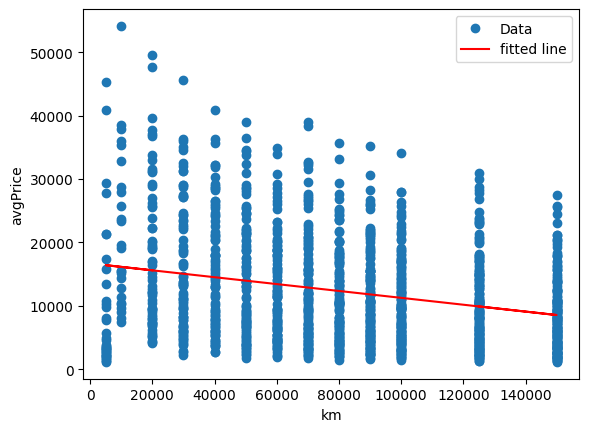

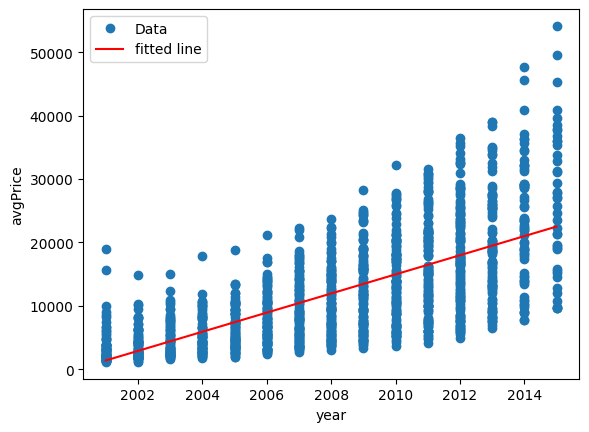

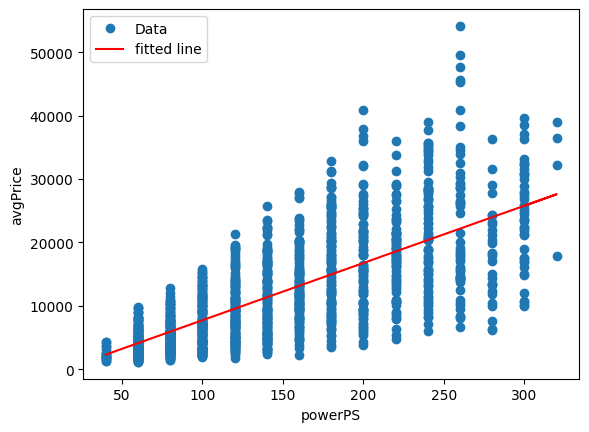

In [16]:
pred_y = [f(x, res.slope, res.intercept) for x, res in zip(data[:-1], results)]

for i in range(3):
    plt.plot(data[i], y, "o", label="Data")
    plt.plot(data[i], pred_y[i], 'r', label='fitted line')
    plt.xlabel(indeces[i])
    plt.ylabel(indeces[-1])
    plt.legend()
    plt.show()

In [12]:
# (Optional) linear regression with linear_model.LinearRegression() (estimate price from year)
# Recall that in Python a mx1 matrix is different from a 1D array -> need to reshape


# your code.....

In [6]:
# (Optional) perform linear regression with a manually implemented least squares (estimate price from year)
# You should get exactly the same solution of linregress !

# your code.....

In [11]:
# (Optional) 2D linear regression with linear model (estimate price from year and power)


# your code......
